In [2]:
import cv2, numpy as np
import time
import pytesseract
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

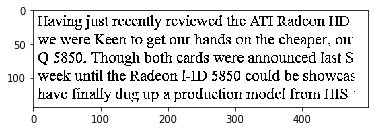

Having just recently reviewed the ATI Radeon HD

we were Keen to get our hands on the cheaper, ou
Q 5850. Though both cards were announced last S
week until the Radeon 1-ID 5850 could be showcas
have finally dug up a production model from HIS :


In [16]:
image = cv2.imread('images/ocr-text.png',0)   
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

print(pytesseract.image_to_string('out.png'))

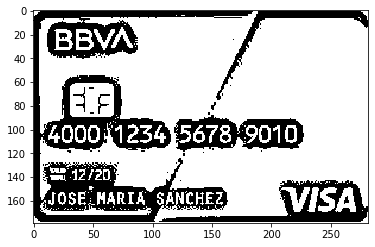

1 =\VZAN

4000 1234 5678 9010

EEE

JOSE MARTA SANCHEZ ‘VISA


In [21]:
image = cv2.imread('images/creditcard.jpg',0)   
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

print(pytesseract.image_to_string('images/creditcard.jpg'))

I found 4 books in that image


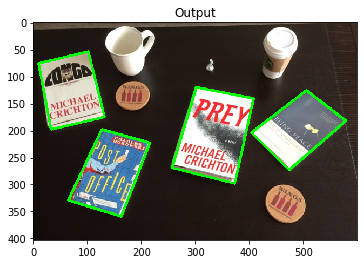

In [22]:
image = cv2.imread("images/book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250) # 차이가 250 이상이면 엣지, 10이하면 엣지 아님, 10~250은 주변정보(엣지냐 아니냐)로 판단
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

[[[296 258  28]
  [360 338  29]
  [302 138  28]
  [356 272  29]
  [240 274  29]
  [176 262  28]
  [256 330  29]
  [176 132  28]
  [426 272  28]
  [240 136  29]
  [308  78  28]
  [264 388  29]
  [242 200  28]
  [180 204  28]
  [ 84 132  27]
  [324 382  29]
  [368 148  28]
  [250  70  29]]]
[(255, 3119), (0, 17)]
[(0, 2464), (255, 900)]
[(255, 3113), (0, 23)]
[(255, 3358), (0, 6)]
[(255, 3138), (0, 226)]
[(255, 2945), (0, 191)]
[(255, 3140), (0, 224)]
[(0, 2646), (255, 490)]
[(0, 2393), (255, 743)]
[(255, 3234), (0, 130)]
[(0, 2621), (255, 515)]
[(0, 2726), (255, 638)]
[(0, 2606), (255, 530)]
[(0, 2697), (255, 439)]
[(255, 2859), (0, 57)]
[(255, 3159), (0, 205)]
[(0, 2447), (255, 689)]
[(0, 2717), (255, 647)]


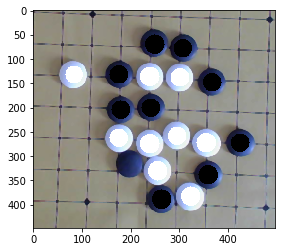

In [8]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold


img = cv2.imread('images/stone.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨
# param2 : 원 형태에 대한 스코어, 높으루록 원에 가까움

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)

circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)

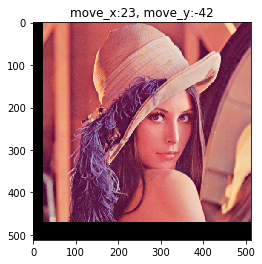

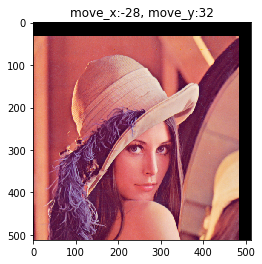

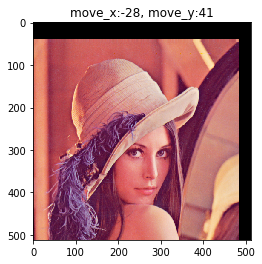

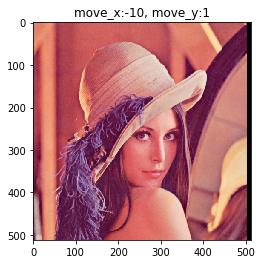

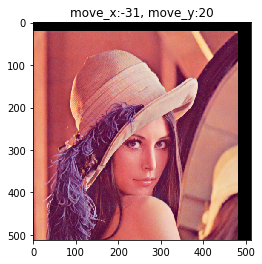

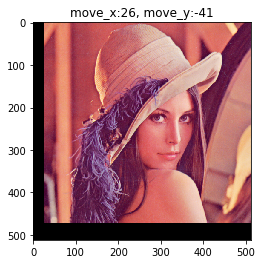

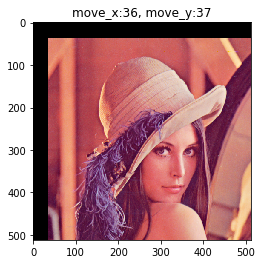

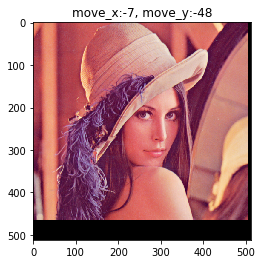

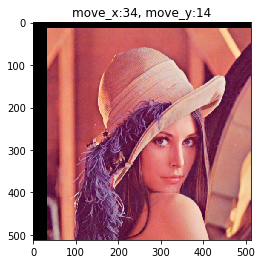

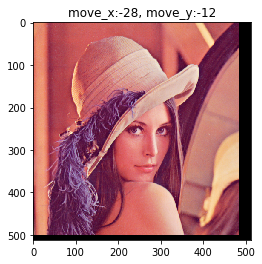

In [32]:
from numpy.random import randint

def M(x, y):
    return np.float32([[1,0,x],
                       [0,1,y]])

img = cv2.imread('images/Lena.png')
h, w = img.shape[:2]
dx = 50

for i in range(10):
    x = randint(-dx,dx)
    y = randint(-dx,dx)
    
    dst = cv2.warpAffine(img, M(x,y), (w, h))
    imshow(f'move_x:{x}, move_y:{y}', dst)
    

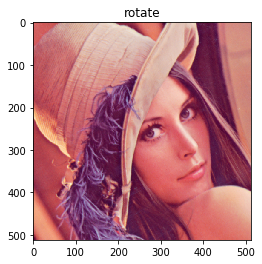

In [36]:
h, w = img.shape[:2]
img_center = (w/2, h/2)
M = cv2.getRotationMatrix2D(img_center, 30, 1.5)

rotate_img = cv2.warpAffine(img, M, (w, h))
imshow('rotate', rotate_img)

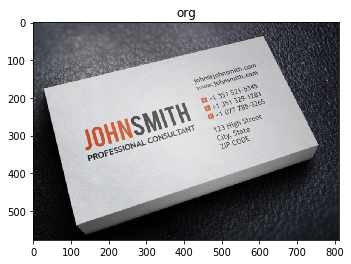

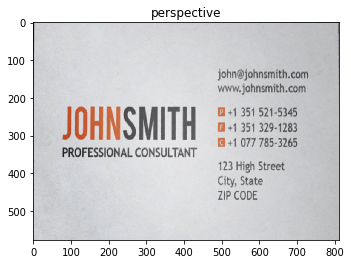

True

In [45]:
img = cv2.imread('images/namecard.png')
imshow('org', img)
h, w = img.shape[:2]

#상단왼쪽, 상단오른쪽, 하단왼쪽, 하단오른쪽
point_list = [[27,179], [611,36], [118,534], [754,325]]

pts1 = np.float32([list(point_list[0]),
                   list(point_list[1]),
                   list(point_list[2]),
                   list(point_list[3])])
pts2 = np.float32([[0,0], [w,0], [0,h], [w,h]])

M = cv2.getPerspectiveTransform(pts1, pts2)

img_result = cv2.warpPerspective(img, M, (w,h))
imshow('perspective', img_result)
cv2.imwrite('perspective.png', img_result)

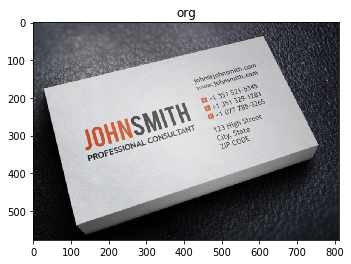

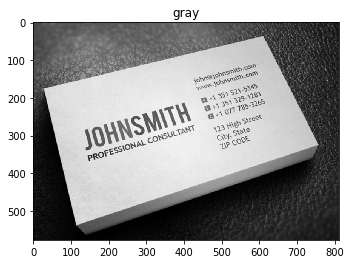

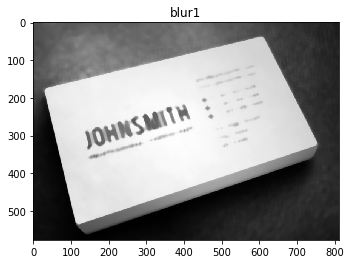

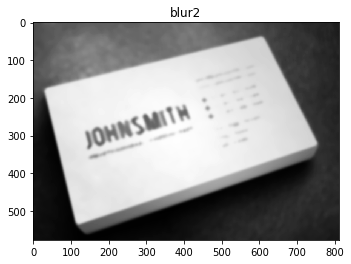

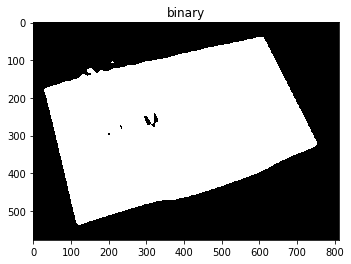

In [64]:
img = cv2.imread('images/namecard.png')
imshow('org', img)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
imshow('gray', gray)

blur1 = cv2.medianBlur(gray, 15)
imshow('blur1', blur1)

blur2 = cv2.GaussianBlur(blur1, (15,15), 0)
imshow('blur2', blur2)

_, binary = cv2.threshold(img_blur,
                          0, 255,
                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('binary', binary)

# cnts, _ = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# for c in cnts:
#     peri = cv2.arcLength(c, True)
#     approx = cv2.approxPolyDP(c, 0.02 * peri, True)

#     if len(approx) == 4:
#         cv2.drawContours(img, [approx], -1, (0, 255, 0), 4)
#         pts1 = approx

# imshow("Output", img)

# pts2 = np.float32([[0,0], [w,0], [0,h], [w,h]])

# M = cv2.getPerspectiveTransform(pts1, pts2)

# img_result = cv2.warpPerspective(img, M, (w,h))
# imshow('perspective', img_result)

